In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("F:/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df1=df.iloc[:,[1,7]]

In [5]:
df1

,Glucose,Age
0,148,50
1,85,31
2,183,32
3,89,21
4,137,33
...,...,...
763,101,63
764,122,27
765,121,30
766,126,47


In [6]:
from sklearn.cluster import KMeans

In [8]:
wcss=[]
for i in range(1,11):
    km=KMeans(i)
    km.fit(df1)
    wcss.append(km.inertia_)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [9]:
wcss

[890142.8932291678,
 379392.29933093453,
 250707.18911963628,
 198225.0094817322,
 161828.50067969508,
 133594.44917326004,
 109185.29330955309,
 91623.38566810713,
 80060.22416124826,
 72234.13964726694]

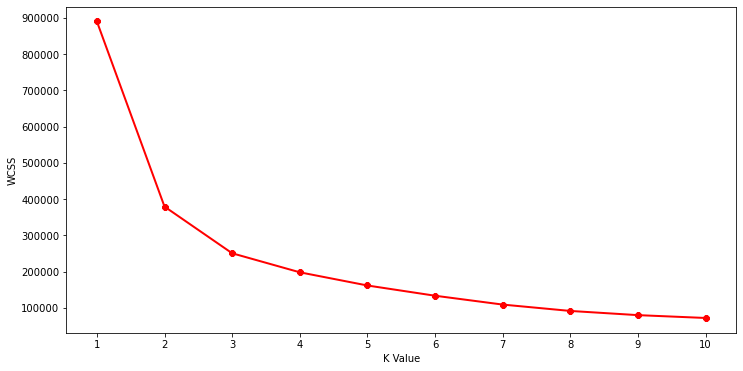

In [10]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss,linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [13]:
kmeans = KMeans(n_clusters=4, init="k-means++",random_state=42)

cluster_values = kmeans.fit_predict(df1)
print(cluster_values)

[2 1 0 1 2 3 1 3 0 2 3 0 2 0 0 3 3 3 3 3 2 3 0 3 2 2 2 3 2 3 3 0 1 1 2 3 2
 3 1 3 0 2 3 0 0 0 2 1 3 3 3 3 1 0 2 1 0 3 2 3 1 2 1 2 3 3 3 3 1 2 3 2 2 2
 1 1 1 1 2 3 3 1 1 3 2 3 3 3 2 3 1 2 1 2 2 2 1 1 1 3 0 2 3 1 1 2 3 2 1 1 0
 2 1 1 0 2 2 1 3 3 0 3 3 2 3 1 3 3 3 3 0 3 0 1 3 2 3 1 2 3 2 3 3 3 2 3 1 3
 2 1 2 3 0 2 0 2 3 3 1 0 2 3 3 3 2 3 2 3 3 3 3 2 1 1 1 0 1 2 2 2 1 3 1 1 2
 0 0 2 3 2 3 2 0 2 1 0 3 3 3 2 3 2 3 3 3 3 0 0 3 0 1 2 0 2 3 2 3 2 1 3 0 0
 3 2 3 1 3 0 0 3 2 2 1 3 1 0 0 0 0 3 1 1 2 3 2 0 2 0 2 3 3 2 1 1 1 3 3 3 0
 2 0 2 1 2 2 3 2 2 3 2 3 3 2 1 3 3 3 3 3 3 2 2 2 0 3 2 2 3 3 3 1 3 2 2 0 2
 2 2 3 3 0 2 1 3 2 3 0 2 2 2 1 3 2 3 3 3 3 0 3 0 2 3 2 2 3 0 3 0 3 3 3 1 0
 3 1 0 3 3 2 0 2 3 1 3 3 2 2 3 3 1 1 2 1 1 1 0 2 2 1 0 0 0 3 2 2 3 2 3 1 2
 0 3 1 3 3 2 3 1 2 1 3 3 3 1 2 3 3 3 2 3 3 0 2 3 0 2 3 2 1 0 3 2 2 1 0 3 3
 3 0 0 3 3 2 2 2 0 3 2 1 2 3 1 3 3 2 0 1 0 2 3 3 1 1 2 1 2 2 2 3 3 0 1 3 3
 3 0 3 1 3 3 1 2 1 2 3 0 2 1 2 2 2 1 1 1 3 3 1 3 3 2 2 2 3 2 3 2 3 3 2 2 0
 3 1 1 2 2 2 0 3 0 1 1 3 

<AxesSubplot:xlabel='Age', ylabel='Glucose'>

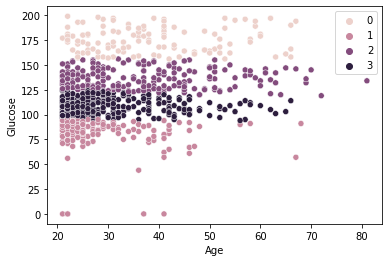

In [14]:
sns.scatterplot(data=df,x='Age', y='Glucose', hue=kmeans.labels_)